<a href="https://colab.research.google.com/github/saiku122/AIJobcolle/blob/master/%E8%AC%9B%E7%BE%A9%E5%BE%8C%E3%81%AE%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0%E6%A8%A1%E5%86%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gitをマウント

>初回は必ず実行



In [1]:
!git clone https://github.com/saiku122/AIJobcolle.git

Cloning into 'AIJobcolle'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 140 (delta 53), reused 60 (delta 14), pack-reused 0
Receiving objects: 100% (140/140), 2.63 MiB | 6.54 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [2]:
cd /content/AIJobcolle/MachineLearning/python

/content/AIJobcolle/MachineLearning/python


線形回帰  
pandasのseries：入力値Xの統計データを表示


In [ ]:
import pandas as pd
from IPython.core.display import display
from sklearn.datasets import load_boston
dataset=load_boston()

X=pd.DataFrame(dataset.data,columns=dataset.feature_names)
y=pd.Series(dataset.target,name='y')
print(y.describe())
display(X.join(y).head())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: y, dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


勾配ブースティンレグレッサー  
GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

est=GradientBoostingRegressor(n_estimators=100,
                              max_depth=5,
                              random_state=5)
est.fit(X,y)
y_pred=est.predict(X)
r2 = r2_score(y, y_pred)
print('R2 score: %.3f' % r2)

R2 score: 0.997


作成したモデルの検証  
過学習に対するホールドアウト法

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.20,
                                              random_state=1)
X_train,X_test,y_train,y_test
# Standard model
est1 = GradientBoostingRegressor(max_depth=3,random_state=1)
est1.fit(X_train,y_train)

# Complex model
est2 = GradientBoostingRegressor(max_depth=10,random_state=1) 
est2.fit(X_train,y_train)

# モデルパフォーマンス指標(R2)の取得
# for training data
r2_est1_train = r2_score(y_train,est1.predict(X_train))
r2_est2_train = r2_score(y_train,est2.predict(X_train))
# for test data
r2_est1_test = r2_score(y_test,est1.predict(X_test))
r2_est2_test = r2_score(y_test,est2.predict(X_test))

# 性能指標の表示
print('Train Score(est1,est2):(%.3f,%.3f)'% (r2_est1_train, r2_est2_train))
print('Test Score(est1,est2):(%.3f,%.3f)'% (r2_est1_test, r2_est2_test))

Train Score(est1,est2):(0.978,1.000)
Test Score(est1,est2):(0.917,0.850)


リッジ回帰におけるサンプルコード  
ボストンデータセット（住居価格）  
X:説明変数（特徴量）  
y:目的変数（価格）



In [ ]:
import pandas as pd
from IPython.core.display import display
from sklearn.datasets import load_boston

dataset = load_boston()
X = pd.DataFrame(dataset.data,
                 columns=dataset.feature_names)
y = pd.Series(dataset.target, name='y')

print('--------------------------------------------')
print('X shape: (%i,%i)' %X.shape)
print('--------------------------------------------')
display(X.join(y).head())

y.describe()

--------------------------------------------
X shape: (506,13)
--------------------------------------------


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: y, dtype: float64

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.20,
                                              random_state=1)

# make pipelines
pipelines={
    'ols':Pipeline([('scl',StandardScaler()),('est',LinearRegression())])
  ,'ridge1': Pipeline([('scl',StandardScaler()),('est',Ridge(alpha=1.0))])
  ,'ridge2': Pipeline([('scl',StandardScaler()),('est',Ridge(alpha=20.0))])
}

# build models
scores = {}
for pipe_name, est in pipelines.items():
    est.fit(X_train, y_train)
    scores[('train',pipe_name)]=r2_score(y_train, est.predict(X_train))
    scores[('test',pipe_name)]=r2_score(y_test, est.predict(X_test))

display(pd.Series(scores).unstack())

# 回帰係数の総和比較
# リッジ回帰の正則化項の役割把握（モデルの「性能」評価ではない）
print('OLS coefficient total:%.6f'%(np.absolute(pipelines['ols'].named_steps['est'].coef_).sum()))
print('Ridge coefficient total:%.6f'%(np.absolute(pipelines['ridge1'].named_steps['est'].coef_).sum()))
print('Ridge coefficient total:%.6f'%(np.absolute(pipelines['ridge2'].named_steps['est'].coef_).sum()))

,ols,ridge1,ridge2
test,0.763417,0.763404,0.758157
train,0.729359,0.729336,0.725291


OLS coefficient total:22.063408
Ridge coefficient total:21.710242
Ridge coefficient total:18.013609


線形回帰モデルのOLS、リッジ回帰、ラッソ回帰の記事値確認


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

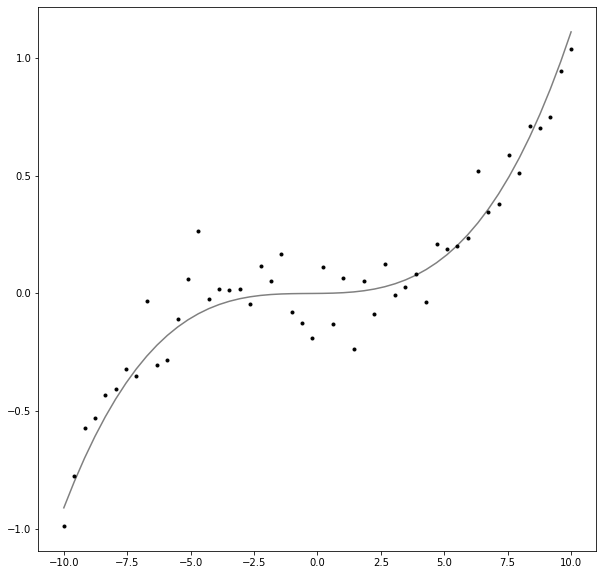

In [ ]:
X = np.linspace(-10, 10, 50)
Y_gt = 0.001 * (X **3 + X**2 + X)
Y = Y_gt + np.random.normal(0, 0.1, len(X))

poly = PolynomialFeatures(degree=30)
X_poly = poly.fit_transform(X[:, np.newaxis])

plt.figure(figsize=(10, 10))
plt.plot(X, Y_gt, color='gray')
plt.plot(X, Y, '.', color='k')
plt.show()

No Regularization Model
[ 77646361752937.609  2100.495  1368.078 -3112.675 -924.213  1280.289
  315.001 -253.024 -57.430  29.178  6.202 -2.160 -0.429  0.108  0.020
 -0.004 -0.001  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000 -0.000
  0.000  0.000 -0.000 -0.000  0.000  0.000]
L1
[ 0.000  0.000  10.428  9.156  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000 -0.000  0.000  0.000  0.000
  0.000]
L2
[ 0.000  115.588  5.022  1.688  0.025  0.016  0.000  0.000  0.000  0.000
  0.000  0.000 -0.000  0.000 -0.000  0.000 -0.000  0.000 -0.000  0.000
 -0.000  0.000 -0.000  0.000 -0.000  0.000 -0.000  0.000 -0.000 -0.000
 -0.000]


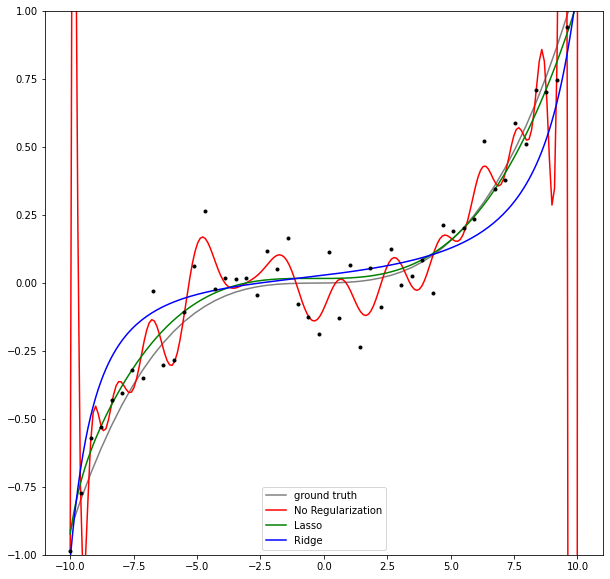

In [ ]:
xs = np.linspace(-10, 10, 200)
from sklearn import linear_model

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

#OLS
model_plain = linear_model.LinearRegression(normalize=True)
model_plain.fit(X_poly, Y)
Y_plain = model_plain.predict(poly.fit_transform(xs[:, np.newaxis]))
print('No Regularization Model')
print(model_plain.coef_ * 10000)

#Lasso
model_lasso = linear_model.LassoLars(normalize=True, alpha=0.001)
model_lasso.fit(X_poly, Y)
Y_lasso = model_lasso.predict(poly.fit_transform(xs[:, np.newaxis]))
print('L1')
print(model_lasso.coef_ * 10000)

#Ridge
model_ridge = linear_model.Ridge(normalize=True, alpha=0.9999)
model_ridge.fit(X_poly, Y)
Y_ridge = model_ridge.predict(poly.fit_transform(xs[:, np.newaxis]))
print('L2')
print(model_ridge.coef_ * 10000)

plt.figure(figsize=(10, 10))
p = plt.subplot()
p.plot(X, Y_gt, color='gray', label='ground truth')
p.plot(xs, Y_plain, color='r', markersize=2, label='No Regularization')
p.plot(xs, Y_lasso, color='g',  markersize=2, label='Lasso')
p.plot(xs, Y_ridge, color='b',  markersize=2, label='Ridge')
p.plot(X, Y, '.', color='k')
p.legend()
p.set_ylim(-1, 1)

plt.show()

第4回 データ前処理&次元削減


In [11]:
import pandas as pd

df=pd.read_csv('./data/av_loan_u6lujuX_CVtuZ9i.csv',header=0)

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
X=df.iloc[:,:-1]
X=X.drop('Loan_ID',axis=1)
y=df.iloc[:,-1]

print('X shape:',X.shape)

X shape: (614, 11)


In [29]:
class_mapping={'N':1,'Y':0}
y=y.map(class_mapping)

In [31]:
print(y.value_counts())
X.join(y).head()

0    422
1    192
Name: Loan_Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [32]:
pd.options.display.max_columns = 50

欠損値補完、  
one-hotエンコーディング

In [39]:
ohe_columns = ['Dependents',
               'Gender',
               'Married',
               'Education',
               'Self_Employed',
               'Property_Area']

X_new=pd.get_dummies(X,
                     dummy_na=True, #dummy_na=Trueとすると、欠損であったという情報も含めone-hot化
                     columns=ohe_columns)
display(X_new.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [42]:
X_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.561889,0.166124,0.164495,0.083062,0.024430,0.182410,0.796417,0.021173,0.346906,0.648208,0.004886,0.781759,0.218241,0.0,0.814332,0.133550,0.052117,0.291531,0.379479,0.328990,0.0
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.496559,0.372495,0.371027,0.276201,0.154506,0.386497,0.402991,0.144077,0.476373,0.477919,0.069786,0.413389,0.413389,0.0,0.389155,0.340446,0.222445,0.454838,0.485653,0.470229,0.0
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [44]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
imp.fit(X_new)

display(X_new.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0


SimpleImputerクラスのメソッドtransfomrを適用することで、LoanAmountの欠損値（1行目など）を平均値（146.412162）に置換できます。

In [45]:
# 学習済みImputerの適用：各列の欠損値の置換
X_new_columns = X_new.columns.values
X_new = pd.DataFrame(imp.transform(X_new),columns=X_new_columns)

# 結果表示
display(X_new.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


次元圧縮


In [46]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 特徴量因子の重要度を推定する分類器をRandomForestClassifierに設定
# 最終的に残す特徴量を10に設定
# 1回のstepで削除する次元数は5%ずつとした
selector=RFE(estimator=RandomForestClassifier(n_estimators=100,random_state=0),
               n_features_to_select=10,
               step=.05)
selector.fit(X_new,y)
print('Done normally')

Done normally


In [47]:
print(selector.support_)

[ True  True  True  True  True  True False False False False False False
 False  True False False  True False False False False False  True  True
 False False]


In [48]:
# 26次元を10次元を圧縮
X_new_selected=selector.transform(X_new)
X_new_selected=pd.DataFrame(X_new_selected,
                            columns=X_new_columns[selector.support_])
print('X shape after RFE:', X_new_selected.shape)
print('---------------------------------------')
print(X_new_selected.dtypes)
X_new_selected.head()

X shape after RFE: (614, 10)
---------------------------------------
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Dependents_0               float64
Married_No                 float64
Education_Graduate         float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
dtype: object


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Married_No,Education_Graduate,Property_Area_Rural,Property_Area_Semiurban
0,5849.0,0.0,146.412162,360.0,1.0,1.0,1.0,1.0,0.0,0.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0
